Привет, Александр! Как дела?) ☺️
<br> Меня зовут Дуолан 👋 Буду проверять твой проект. Давай вместе доведем его до идеала 😉
<br> Дальнейшее общение будет происходить на «ты», если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий («исправил», «не понятно как исправить ошибку», ...)
<br> Пожалуйста, не удаляй мои комментарии, они будут необходимы для повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b> Если требуются исправления
</div>

Работа не может быть принята с красными комментариями.

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b> 

Важно чтобы в проектах было подробное описание: когда потенциальные работодатели будут смотреть твой проект в портфолио, им нужно будет понимать задачу, чтобы можно было оценить её решение. Вот что можно добавить:
    
* Описание целей и задачи проекта
* Описание данных
* План работы

И рекомендую писать все своими словами. Так работа выглядит более самостоятельной)
</div>

## Подготовка данных

1.1 импортируем необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px 
from IPython.display import display 
pd.set_option('display.max_columns', None) 
pd.set_option('display.float_format', '{:.3f}'.format)
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OrdinalEncoder # порядковое кодирование
from sklearn.model_selection import train_test_split # деление на 2 выборки
from sklearn.model_selection import GridSearchCV # для поиска оптимальных параметров
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
import lightgbm as lgb
from lightgbm import LGBMRegressor # новая библиотека, изучил, описал ее преимущества ниже
from catboost import CatBoostRegressor
import time

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Правильное решение — выделять отдельную ячейку в начале проекта под подключение библиотек и настройки. Tак код легче поддерживать 👌 Но также стоит соблюдать рекомендации PEP-8 при написании кода. У импортов есть тоже определенные правила. Это сделано для повышения читабельности и простоты работы с кодом.

https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html
</div>

1.2 загрузим и проанализируем признаки в dataset

In [2]:
df = pd.read_csv('/datasets/autos.csv', sep=',')
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


1.3 проверим столбцы на пропуски и типы данных

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

# вывод
 - Есть столбцы явно лишние, так как они не влияют не цену: DateCrawled, RegistrationMonth, DateCreated, PostalCode, LastSeen, NumberOfPictures. Считаю правильным удалить эти признаки.
 - Замечен ряд признаков с пропусками данных: VehicleType, Gearbox, Model, FuelType, NotRepaired. 
 - Нулевые цены на автомобили значительно смещают среднее арифмитическое и могут считатться выбросами.
 - Обнаружились нереальные годы регистрации авто.
 - Есть ряд авто с нереалистичной мощностью: либо мощность вообще отсуствует, либо очень большая.
 - Необходимо провести исследовательский анализ данных

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Ты хорошо владеешь методами первичного анализа данных 👍 Спасибо за информативный вывод)
</div>

In [4]:
useless = ['DateCrawled', 'RegistrationMonth', 'DateCreated', 'PostalCode', 'LastSeen', 'NumberOfPictures']
df = df.drop(useless, axis=1)
df.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no


<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Удалить неинформативные признаки - хорошее решение 👍
</div>

1.4 Требуется заполнить пропуски и начнем с 'VehicleType' и 'Model'

In [5]:
df['VehicleType'].value_counts(dropna=False)

sedan          91457
small          79831
wagon          65166
NaN            37490
bus            28775
convertible    20203
coupe          16163
suv            11996
other           3288
Name: VehicleType, dtype: int64

пропусков = 37490,так же есть название 'other'

In [6]:
df[df['VehicleType'].isna()].info() #Посмотрим сколько пропусков в типе авто и как заполнены другие данные для таких строк.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37490 entries, 0 to 354365
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Price             37490 non-null  int64 
 1   VehicleType       0 non-null      object
 2   RegistrationYear  37490 non-null  int64 
 3   Gearbox           27520 non-null  object
 4   Power             37490 non-null  int64 
 5   Model             30662 non-null  object
 6   Kilometer         37490 non-null  int64 
 7   FuelType          20195 non-null  object
 8   Brand             37490 non-null  object
 9   NotRepaired       16919 non-null  object
dtypes: int64(4), object(6)
memory usage: 3.1+ MB


Пропуски в типах авто можно заполнить ориентиирусь на модель автомобиля. При этом всего для 30662 объектов указана модель, значит только для них можно выявить тип авто на основе схожих данных, а остальные данные можно заменить на 'other'

In [7]:
df['Model'] = df['Model'].fillna('other')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             354369 non-null  int64 
 1   VehicleType       316879 non-null  object
 2   RegistrationYear  354369 non-null  int64 
 3   Gearbox           334536 non-null  object
 4   Power             354369 non-null  int64 
 5   Model             354369 non-null  object
 6   Kilometer         354369 non-null  int64 
 7   FuelType          321474 non-null  object
 8   Brand             354369 non-null  object
 9   NotRepaired       283215 non-null  object
dtypes: int64(4), object(6)
memory usage: 27.0+ MB


In [8]:
# то же самое проделаем для типов авто
df['VehicleType'] = df['VehicleType'].fillna('other')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             354369 non-null  int64 
 1   VehicleType       354369 non-null  object
 2   RegistrationYear  354369 non-null  int64 
 3   Gearbox           334536 non-null  object
 4   Power             354369 non-null  int64 
 5   Model             354369 non-null  object
 6   Kilometer         354369 non-null  int64 
 7   FuelType          321474 non-null  object
 8   Brand             354369 non-null  object
 9   NotRepaired       283215 non-null  object
dtypes: int64(4), object(6)
memory usage: 27.0+ MB


In [9]:
# проверим сколько авто на механике и сколько на автомате, а сколько не определено
df['Gearbox'].value_counts(dropna=False)

manual    268251
auto       66285
NaN        19833
Name: Gearbox, dtype: int64

Очевидно наибольшее кол-во авто на механической коробке передач, при этом 19833 авто не определены на какой коробке

In [10]:
df['Gearbox'] = df['Gearbox'].fillna('other')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             354369 non-null  int64 
 1   VehicleType       354369 non-null  object
 2   RegistrationYear  354369 non-null  int64 
 3   Gearbox           354369 non-null  object
 4   Power             354369 non-null  int64 
 5   Model             354369 non-null  object
 6   Kilometer         354369 non-null  int64 
 7   FuelType          321474 non-null  object
 8   Brand             354369 non-null  object
 9   NotRepaired       283215 non-null  object
dtypes: int64(4), object(6)
memory usage: 27.0+ MB


In [11]:
# заполним пропуски для типа топлива
df['FuelType'].value_counts(dropna=False)


petrol      216352
gasoline     98720
NaN          32895
lpg           5310
cng            565
hybrid         233
other          204
electric        90
Name: FuelType, dtype: int64

In [12]:
df['FuelType'] = df['FuelType'].fillna('other')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             354369 non-null  int64 
 1   VehicleType       354369 non-null  object
 2   RegistrationYear  354369 non-null  int64 
 3   Gearbox           354369 non-null  object
 4   Power             354369 non-null  int64 
 5   Model             354369 non-null  object
 6   Kilometer         354369 non-null  int64 
 7   FuelType          354369 non-null  object
 8   Brand             354369 non-null  object
 9   NotRepaired       283215 non-null  object
dtypes: int64(4), object(6)
memory usage: 27.0+ MB


In [13]:
# заполним пропуски в данных о том, ремонтирована было авто или нет
df['NotRepaired'].value_counts(dropna=False)

no     247161
NaN     71154
yes     36054
Name: NotRepaired, dtype: int64

Судя по всему при обнародовании объявлений 71154 человек просто не указали был ли авто в ремонте или нет, автоматом подразумевая, что не был. В связи с этим мы заменим 'NaN' на 'no'. 

In [14]:
df['NotRepaired'] = df['NotRepaired'].fillna('no')
df['NotRepaired'].value_counts(dropna=False)

no     318315
yes     36054
Name: NotRepaired, dtype: int64

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Пропуски успешно заполнены 👍 Модели теперь не будут капризничать)
</div>

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b>

Пропущенные значения в признаках vehicle_type, gearbox, fuel_type можно заполнить, исходя из бренда и модели автомобиля:
</div>

```python
df['Name'] = df['Brand'] + ' ' + df['Model']
# заполняем пропуски в VehicleType
names_vt = [name for name in list(df[df['VehicleType'].isna()]['Name'].unique()) if isinstance(name, str) == True]

for name in names_vt:
    df.loc[(df['Name']==name)&(df['VehicleType'].isna()), 'VehicleType'] = df[df['Name']==name]['VehicleType'].value_counts().index[0]
```

1.5 Теперь нужно ислледовать аномальные значения (возможные выбросы)

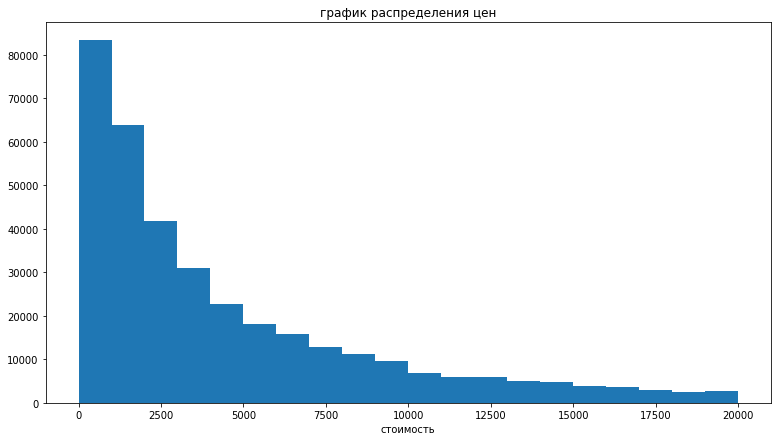

In [15]:
plt.figure(figsize=(13,7))
plt.hist(df['Price'], bins=20)
plt.title("график распределения цен")
plt.xlabel("стоимость")
plt.show()

необходимо проверить сколько машиин выставлено за цену  = 0 евро

In [16]:
df[df['Price'] == 0]

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired
7,0,sedan,1980,manual,50,other,40000,petrol,volkswagen,no
40,0,other,1990,other,0,corsa,150000,petrol,opel,no
111,0,other,2017,manual,0,golf,5000,petrol,volkswagen,no
115,0,small,1999,other,0,other,5000,petrol,volkswagen,no
152,0,bus,2004,manual,101,meriva,150000,lpg,opel,yes
...,...,...,...,...,...,...,...,...,...,...
354205,0,other,2000,manual,65,corsa,150000,other,opel,yes
354238,0,small,2002,manual,60,fiesta,150000,petrol,ford,no
354248,0,small,1999,manual,53,swift,150000,petrol,suzuki,no
354277,0,small,1999,manual,37,arosa,150000,petrol,seat,yes


In [17]:
# проверим сколько предоложений ниже 100 евро
df[df['Price'] < 100]

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired
7,0,sedan,1980,manual,50,other,40000,petrol,volkswagen,no
40,0,other,1990,other,0,corsa,150000,petrol,opel,no
59,1,suv,1994,manual,286,other,150000,other,sonstige_autos,no
89,1,sedan,1995,manual,113,e_klasse,150000,gasoline,mercedes_benz,no
111,0,other,2017,manual,0,golf,5000,petrol,volkswagen,no
...,...,...,...,...,...,...,...,...,...,...
354238,0,small,2002,manual,60,fiesta,150000,petrol,ford,no
354248,0,small,1999,manual,53,swift,150000,petrol,suzuki,no
354277,0,small,1999,manual,37,arosa,150000,petrol,seat,yes
354309,99,small,1999,manual,60,arosa,150000,petrol,seat,yes


In [18]:
# проверим, может битые продают
df[df['Price'] < 100]['NotRepaired'].value_counts()

no     10752
yes     2562
Name: NotRepaired, dtype: int64

# Вывод

 - авто стоимостью до 100 евро в большинстве битые.
 - Битые авто могут продаваться за такую низкую цену например на запчасти, но целая машина точно не может стоить меньше. Поэтому небитые машины с ценой менее 100 евро мы удалим.
 - Очень большое количество данных, где цена авто = 0, что вполне может быть ошибкой заполнения данных. Истинныую причину сложно установить, поэтому авто с 0-й ценой также лучше дропнуть.
 

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

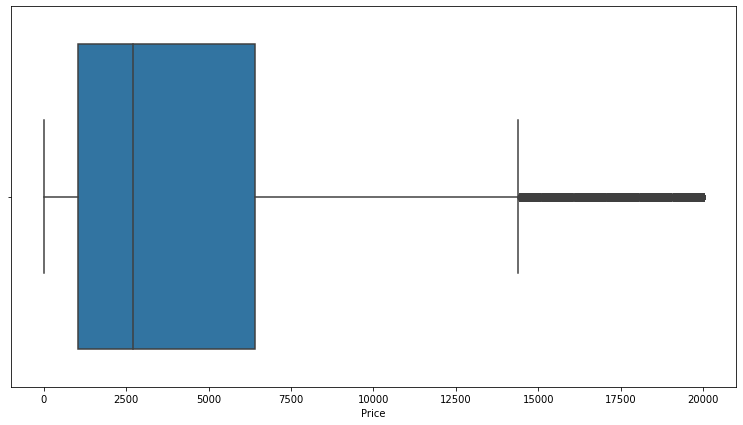

In [19]:
# используем ящик с усами для определения возможных выбросов в виде слишком высоких цен
plt.figure(figsize=(13,7))
sns.boxplot(df['Price'])

Граница правого уса заканчивается на цене почти  15000 евро, далее идут очень дорогие машины. Теперь стоит выяснить выбросы ли это.

In [20]:
df[df['Price'] > 15000]

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired
1,18300,coupe,2011,manual,190,other,125000,gasoline,audi,yes
14,17999,suv,2011,manual,190,navara,70000,gasoline,nissan,no
33,18000,sedan,2007,auto,218,3er,20000,petrol,bmw,no
172,19750,convertible,2006,manual,305,mustang,50000,petrol,ford,no
179,16449,wagon,2015,auto,110,fabia,10000,petrol,skoda,no
...,...,...,...,...,...,...,...,...,...,...
354210,17990,bus,2007,auto,174,transporter,125000,gasoline,volkswagen,no
354279,16500,suv,2013,manual,116,i_reihe,30000,gasoline,hyundai,no
354286,16500,coupe,1973,manual,200,other,150000,petrol,bmw,yes
354306,16999,wagon,2008,auto,269,a6,150000,gasoline,audi,no


# Вывод

 - видно, что в диапазон цен свыше 15000 попало много авто и их можно считать ашинами дорогого сегмента, поэтому их мы исключать из dataset не будем.
 

In [21]:
# проведем исключение авто с нулевой ценой и битых ниже 100 евро
df = df[df['Price'] != 0]
df = df.drop(df[(df['Price'] < 100) & (df['NotRepaired'] != 'no')].index)

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

В данных остались машины только с адекватной ценой 👍
</div>

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343040 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             343040 non-null  int64 
 1   VehicleType       343040 non-null  object
 2   RegistrationYear  343040 non-null  int64 
 3   Gearbox           343040 non-null  object
 4   Power             343040 non-null  int64 
 5   Model             343040 non-null  object
 6   Kilometer         343040 non-null  int64 
 7   FuelType          343040 non-null  object
 8   Brand             343040 non-null  object
 9   NotRepaired       343040 non-null  object
dtypes: int64(4), object(6)
memory usage: 28.8+ MB


In [23]:
# проверим на дубликаты
df.duplicated().sum() 

50028

In [24]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293012 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             293012 non-null  int64 
 1   VehicleType       293012 non-null  object
 2   RegistrationYear  293012 non-null  int64 
 3   Gearbox           293012 non-null  object
 4   Power             293012 non-null  int64 
 5   Model             293012 non-null  object
 6   Kilometer         293012 non-null  int64 
 7   FuelType          293012 non-null  object
 8   Brand             293012 non-null  object
 9   NotRepaired       293012 non-null  object
dtypes: int64(4), object(6)
memory usage: 24.6+ MB


# Вывод

 - Очень много похожих авто. Эти дубликаты мы удалили.
 

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

От явных дубликатов избавились 👍
</div>

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b>

В году регистрации есть выбросы и аномалии. Если посмотреть на дату сбора данных, то можно скорректировать верхнюю границу.
</div>

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b>

В признаке 'power' есть выбросы и аномалии. Мощность можно ограничить максимальной и минимальной приемлемыми значениями
</div>

1.6 проверим на мультиколлинеарность 
 

<AxesSubplot:>

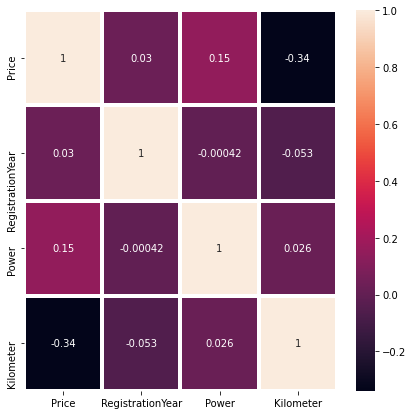

In [25]:
plt.rcParams['figure.figsize'] = (7.0, 7.0)
sns.heatmap(df.corr(), annot=True, linewidths=3, linecolor='white')

# Вывод

 - Цена незначительно зависит от мощности авто, признаки не коррелируют друг с другом, следовательно удаления признаков не требуется.
 

1.7 Проведм кодировку категориальных признаков
Признаки 'VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired' закодируем one-hot encoding.
После - разделим выбрки на обучающую и тестовыую, потом проведем масштабирование числовых признаков.

In [26]:
categorical_columns = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']
# кодирование OHE
df_ohe = pd.get_dummies(df, drop_first=True, columns=categorical_columns)
display(df_ohe.head(10))

# кодирование OE
encoder = OrdinalEncoder()
df_ord = df.copy()
df_ord[categorical_columns] = encoder.fit_transform(df_ord[categorical_columns])
display(df_ord.head(10))

,Price,RegistrationYear,Power,Kilometer,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,VehicleType_wagon,Gearbox_manual,Gearbox_other,Model_145,Model_147,Model_156,Model_159,Model_1_reihe,Model_1er,Model_200,Model_2_reihe,Model_300c,Model_3_reihe,Model_3er,Model_4_reihe,Model_500,Model_5_reihe,Model_5er,Model_601,Model_6_reihe,Model_6er,Model_7er,Model_80,Model_850,Model_90,Model_900,Model_9000,Model_911,Model_a1,Model_a2,Model_a3,Model_a4,Model_a5,Model_a6,Model_a8,Model_a_klasse,Model_accord,Model_agila,Model_alhambra,Model_almera,Model_altea,Model_amarok,Model_antara,Model_arosa,Model_astra,Model_auris,Model_avensis,Model_aveo,Model_aygo,Model_b_klasse,Model_b_max,Model_beetle,Model_berlingo,Model_bora,Model_boxster,Model_bravo,Model_c1,Model_c2,Model_c3,Model_c4,Model_c5,Model_c_klasse,Model_c_max,Model_c_reihe,Model_caddy,Model_calibra,Model_captiva,Model_carisma,Model_carnival,Model_cayenne,Model_cc,Model_ceed,Model_charade,Model_cherokee,Model_citigo,Model_civic,Model_cl,Model_clio,Model_clk,Model_clubman,Model_colt,Model_combo,Model_cooper,Model_cordoba,Model_corolla,Model_corsa,Model_cr_reihe,Model_croma,Model_crossfire,Model_cuore,Model_cx_reihe,Model_defender,Model_delta,Model_discovery,Model_doblo,Model_ducato,Model_duster,Model_e_klasse,Model_elefantino,Model_eos,Model_escort,Model_espace,Model_exeo,Model_fabia,Model_fiesta,Model_focus,Model_forester,Model_forfour,Model_fortwo,Model_fox,Model_freelander,Model_fusion,Model_g_klasse,Model_galant,Model_galaxy,Model_getz,Model_gl,Model_glk,Model_golf,Model_grand,Model_i3,Model_i_reihe,Model_ibiza,Model_impreza,Model_insignia,Model_jazz,Model_jetta,Model_jimny,Model_juke,Model_justy,Model_ka,Model_kadett,Model_kaefer,Model_kalina,Model_kalos,Model_kangoo,Model_kappa,Model_kuga,Model_laguna,Model_lancer,Model_lanos,Model_legacy,Model_leon,Model_lodgy,Model_logan,Model_lupo,Model_lybra,Model_m_klasse,Model_m_reihe,Model_materia,Model_matiz,Model_megane,Model_meriva,Model_micra,Model_mii,Model_modus,Model_mondeo,Model_move,Model_musa,Model_mustang,Model_mx_reihe,Model_navara,Model_niva,Model_note,Model_nubira,Model_octavia,Model_omega,Model_one,Model_other,Model_outlander,Model_pajero,Model_panda,Model_passat,Model_phaeton,Model_picanto,Model_polo,Model_primera,Model_ptcruiser,Model_punto,Model_q3,Model_q5,Model_q7,Model_qashqai,Model_r19,Model_range_rover,Model_range_rover_evoque,Model_range_rover_sport,Model_rangerover,Model_rav,Model_rio,Model_roadster,Model_roomster,Model_rx_reihe,Model_s60,Model_s_klasse,Model_s_max,Model_s_type,Model_samara,Model_sandero,Model_santa,Model_scenic,Model_scirocco,Model_seicento,Model_serie_1,Model_serie_2,Model_serie_3,Model_sharan,Model_signum,Model_sirion,Model_sl,Model_slk,Model_sorento,Model_spark,Model_spider,Model_sportage,Model_sprinter,Model_stilo,Model_superb,Model_swift,Model_terios,Model_tigra,Model_tiguan,Model_toledo,Model_touareg,Model_touran,Model_transit,Model_transporter,Model_tt,Model_tucson,Model_twingo,Model_up,Model_v40,Model_v50,Model_v60,Model_v70,Model_v_klasse,Model_vectra,Model_verso,Model_viano,Model_vito,Model_vivaro,Model_voyager,Model_wrangler,Model_x_reihe,Model_x_trail,Model_x_type,Model_xc_reihe,Model_yaris,Model_yeti,Model_ypsilon,Model_z_reihe,Model_zafira,FuelType_electric,FuelType_gasoline,FuelType_hybrid,FuelType_lpg,FuelType_other,FuelType_petrol,Brand_audi,Brand_bmw,Brand_chevrolet,Brand_chrysler,Brand_citroen,Brand_dacia,Brand_daewoo,Brand_daihatsu,Brand_fiat,Brand_ford,Brand_honda,Brand_hyundai,Brand_jaguar,Brand_jeep,Brand_kia,Brand_lada,Brand_lancia,Brand_land_rover,Brand_mazda,Brand_mercedes_benz,Brand_mini,Brand_mitsubishi,Brand_nissan,Brand_opel,Brand_peugeot,Brand_porsche,Brand_renault,Brand_rover,Brand_saab,Brand_seat,Brand_skoda,Brand_smart,Brand_sonstige_autos,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo,NotRepaired_yes
0,480,1993,0,150000,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired
0,480,3.000,1993,1.000,0,116.000,150000,6.000,38.000,0.000
1,18300,2.000,2011,1.000,190,166.000,125000,2.000,1.000,1.000
2,9800,6.000,2004,0.000,163,117.000,125000,2.000,14.000,0.000
3,1500,5.000,2001,1.000,75,116.000,150000,6.000,38.000,0.000
4,3600,5.000,2008,1.000,69,101.000,90000,2.000,31.000,0.000
5,650,4.000,1995,1.000,102,11.000,150000,6.000,2.000,1.000
6,2200,1.000,2004,1.000,109,8.000,150000,6.000,25.000,0.000
8,14500,0.000,2014,1.000,125,60.000,30000,6.000,10.000,0.000
9,999,5.000,1998,1.000,101,116.000,150000,5.000,38.000,0.000
10,2000,4.000,2004,1.000,105,10.000,150000,6.000,19.000,0.000


<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 

Молодец, что для различных моделей используешь различные методы кодирования 👍
</div>

1.8 Теперь нужно провести подготовку выборок
Выделим признаки, целевой признак. Разделим выборку на обучающую и тестовую в соотношении 1:4.

In [27]:
# Необходима функция для деления датасетов на обучающую, и тестовую выборки
def split_func (df):
    target = df['Price']
    features = df.drop('Price', axis=1)
    
    features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345) # разделили выборки в пропорции 2 к 8
    
    
    return features_train, features_test, target_train, target_test

In [28]:
# получим выборки для кодировки OHE
features_train_ohe, features_test_ohe, target_train_ohe, target_test_ohe = split_func(df_ohe)

In [29]:
# проверим полученные размерности
for i in [features_train_ohe, features_test_ohe, target_train_ohe, target_test_ohe]:
    print(i.shape)

(234409, 307)
(58603, 307)
(234409,)
(58603,)


In [30]:
# получим выборки для кодировки ord
features_train_ord, features_test_ord, target_train_ord, target_test_ord = split_func(df_ord)

# проверим полученные размерности
for i in [features_train_ord, features_test_ord, target_train_ord, target_test_ord]:
    print(i.shape)

(234409, 9)
(58603, 9)
(234409,)
(58603,)


In [31]:
# получим выборки без кодировки
features_train_no, features_test_no, target_train_no, target_test_no = split_func(df)

# проверим полученные размерности
for i in [features_train_no, features_test_no, target_train_no, target_test_no]:
    print(i.shape)

(234409, 9)
(58603, 9)
(234409,)
(58603,)


<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 

Данные поделены верно, пропорции выбраны адекватные 👍
</div>

1.9 Проведём масштабирование признаков с помощью метода StandardScaler

In [32]:
# подготовим функцию для масштабирования
def ss (features_train, features_test):
    numeric = ['RegistrationYear', 'Power', 'Kilometer']
    scaler = StandardScaler()
    scaler.fit(features_train[numeric])
    
    features_train[numeric] = scaler.transform(features_train[numeric])
    features_test[numeric] = scaler.transform(features_test[numeric])
    
    return features_train, features_test

In [33]:
# масштабируем данные с кодировкой ohe
features_train_ohe, features_test_ohe = ss (features_train_ohe, features_test_ohe)
features_train_ohe.describe() # проверим результат масштабирования

,RegistrationYear,Power,Kilometer,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,VehicleType_wagon,Gearbox_manual,Gearbox_other,Model_145,Model_147,Model_156,Model_159,Model_1_reihe,Model_1er,Model_200,Model_2_reihe,Model_300c,Model_3_reihe,Model_3er,Model_4_reihe,Model_500,Model_5_reihe,Model_5er,Model_601,Model_6_reihe,Model_6er,Model_7er,Model_80,Model_850,Model_90,Model_900,Model_9000,Model_911,Model_a1,Model_a2,Model_a3,Model_a4,Model_a5,Model_a6,Model_a8,Model_a_klasse,Model_accord,Model_agila,Model_alhambra,Model_almera,Model_altea,Model_amarok,Model_antara,Model_arosa,Model_astra,Model_auris,Model_avensis,Model_aveo,Model_aygo,Model_b_klasse,Model_b_max,Model_beetle,Model_berlingo,Model_bora,Model_boxster,Model_bravo,Model_c1,Model_c2,Model_c3,Model_c4,Model_c5,Model_c_klasse,Model_c_max,Model_c_reihe,Model_caddy,Model_calibra,Model_captiva,Model_carisma,Model_carnival,Model_cayenne,Model_cc,Model_ceed,Model_charade,Model_cherokee,Model_citigo,Model_civic,Model_cl,Model_clio,Model_clk,Model_clubman,Model_colt,Model_combo,Model_cooper,Model_cordoba,Model_corolla,Model_corsa,Model_cr_reihe,Model_croma,Model_crossfire,Model_cuore,Model_cx_reihe,Model_defender,Model_delta,Model_discovery,Model_doblo,Model_ducato,Model_duster,Model_e_klasse,Model_elefantino,Model_eos,Model_escort,Model_espace,Model_exeo,Model_fabia,Model_fiesta,Model_focus,Model_forester,Model_forfour,Model_fortwo,Model_fox,Model_freelander,Model_fusion,Model_g_klasse,Model_galant,Model_galaxy,Model_getz,Model_gl,Model_glk,Model_golf,Model_grand,Model_i3,Model_i_reihe,Model_ibiza,Model_impreza,Model_insignia,Model_jazz,Model_jetta,Model_jimny,Model_juke,Model_justy,Model_ka,Model_kadett,Model_kaefer,Model_kalina,Model_kalos,Model_kangoo,Model_kappa,Model_kuga,Model_laguna,Model_lancer,Model_lanos,Model_legacy,Model_leon,Model_lodgy,Model_logan,Model_lupo,Model_lybra,Model_m_klasse,Model_m_reihe,Model_materia,Model_matiz,Model_megane,Model_meriva,Model_micra,Model_mii,Model_modus,Model_mondeo,Model_move,Model_musa,Model_mustang,Model_mx_reihe,Model_navara,Model_niva,Model_note,Model_nubira,Model_octavia,Model_omega,Model_one,Model_other,Model_outlander,Model_pajero,Model_panda,Model_passat,Model_phaeton,Model_picanto,Model_polo,Model_primera,Model_ptcruiser,Model_punto,Model_q3,Model_q5,Model_q7,Model_qashqai,Model_r19,Model_range_rover,Model_range_rover_evoque,Model_range_rover_sport,Model_rangerover,Model_rav,Model_rio,Model_roadster,Model_roomster,Model_rx_reihe,Model_s60,Model_s_klasse,Model_s_max,Model_s_type,Model_samara,Model_sandero,Model_santa,Model_scenic,Model_scirocco,Model_seicento,Model_serie_1,Model_serie_2,Model_serie_3,Model_sharan,Model_signum,Model_sirion,Model_sl,Model_slk,Model_sorento,Model_spark,Model_spider,Model_sportage,Model_sprinter,Model_stilo,Model_superb,Model_swift,Model_terios,Model_tigra,Model_tiguan,Model_toledo,Model_touareg,Model_touran,Model_transit,Model_transporter,Model_tt,Model_tucson,Model_twingo,Model_up,Model_v40,Model_v50,Model_v60,Model_v70,Model_v_klasse,Model_vectra,Model_verso,Model_viano,Model_vito,Model_vivaro,Model_voyager,Model_wrangler,Model_x_reihe,Model_x_trail,Model_x_type,Model_xc_reihe,Model_yaris,Model_yeti,Model_ypsilon,Model_z_reihe,Model_zafira,FuelType_electric,FuelType_gasoline,FuelType_hybrid,FuelType_lpg,FuelType_other,FuelType_petrol,Brand_audi,Brand_bmw,Brand_chevrolet,Brand_chrysler,Brand_citroen,Brand_dacia,Brand_daewoo,Brand_daihatsu,Brand_fiat,Brand_ford,Brand_honda,Brand_hyundai,Brand_jaguar,Brand_jeep,Brand_kia,Brand_lada,Brand_lancia,Brand_land_rover,Brand_mazda,Brand_mercedes_benz,Brand_mini,Brand_mitsubishi,Brand_nissan,Brand_opel,Brand_peugeot,Brand_porsche,Brand_renault,Brand_rover,Brand_saab,Brand_seat,Brand_skoda,Brand_smart,Brand_sonstige_autos,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo,NotRepaired_yes
count,234409.000,234409.000,234409.000,234409.000,234409.000,234409.000,

In [34]:
# масштабируем данные с кодировкой ord
features_train_ord, features_test_ord = ss (features_train_ord, features_test_ord)

In [35]:
# масштабируем данные с кодировкой no
features_train_no, features_test_no = ss (features_train_no, features_test_no)

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Отлично, признаки масштабированы 👍 Не забыли, что fit нужно делать только на train выборке.
</div>

# выводы:
 - Есть столбцы явно лишние, так как они не влияют не цену: DateCrawled, RegistrationMonth, DateCreated, PostalCode, LastSeen, NumberOfPictures. Считаю правильным удалить эти признаки.
 - Замечен ряд признаков с пропусками данных: VehicleType, Gearbox, Model, FuelType, NotRepaired. 
 - Нулевые цены на автомобили значительно смещают среднее арифмитическое и могут считатться выбросами.
 - Обнаружились нереальные годы регистрации авто.
 - Есть ряд авто с нереалистичной мощностью: либо мощность вообще отсуствует, либо очень большая.
 - Необходимо провести исследовательский анализ данных
 - авто стоимостью до 100 евро в большинстве битые.
 - Битые авто могут продаваться за такую низкую цену например на запчасти, но целая машина точно не может стоить меньше. Поэтому небитые машины с ценой менее 100 евро мы удалим.
 - Очень большое количество данных, где цена авто = 0, что вполне может быть ошибкой заполнения данных. Истинныую причину сложно установить, поэтому авто с 0-й ценой также лучше дропнуть.
 - видно, что в диапазон цен свыше 15000 попало много авто и их можно считать ашинами дорогого сегмента, поэтому их мы исключать из dataset не будем.
 - DataSet исследован на предмет дубликатов. Очень много похожих авто. Эти дубликаты мы удалили.
 - Проведено исследование на мультиколлинеарность. Цена незначительно зависит от мощности авто, признаки не коррелируют друг с другом, следовательно удаления признаков не требуется.
 
 

## Обучение моделей

2.1 Для начала создадим константную base-line модель. Она всегда будет предсказывать среднее значение Price. Рассчитаем RMSE для base-line модели.

In [36]:
# Необходима функция для необходимого score
def rmse_score (target, predictions):
    rmse = mean_squared_error(target, predictions)**0.5
    return rmse
scorer = make_scorer(rmse_score, greater_is_better=False)

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Хороший помощник 👍
</div>

2.2 Линейная регрессия

In [37]:
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False]}
grid = GridSearchCV(model, parameters, cv=5, scoring=scorer, verbose=5)
grid.fit(features_train_ohe, target_train_ohe)
print("RMSE линейной регрессии составляет ", grid.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .............fit_intercept=True, normalize=True; total time=  19.2s
[CV 2/5] END .............fit_intercept=True, normalize=True; total time=  22.7s
[CV 3/5] END .............fit_intercept=True, normalize=True; total time=  17.3s
[CV 4/5] END .............fit_intercept=True, normalize=True; total time=  20.7s
[CV 5/5] END .............fit_intercept=True, normalize=True; total time=  17.5s
[CV 1/5] END ............fit_intercept=True, normalize=False; total time=  15.0s
[CV 2/5] END ............fit_intercept=True, normalize=False; total time=  18.8s
[CV 3/5] END ............fit_intercept=True, normalize=False; total time=  20.9s
[CV 4/5] END ............fit_intercept=True, normalize=False; total time=  16.0s
[CV 5/5] END ............fit_intercept=True, normalize=False; total time=  19.0s
[CV 1/5] END ............fit_intercept=False, normalize=True; total time=  22.7s
[CV 2/5] END ............fit_intercept=False, nor

In [38]:
print('Наилучшие параметры для линейной регрессии')
grid.best_params_

Наилучшие параметры для линейной регрессии


{'fit_intercept': True, 'normalize': False}

2.2 Решающее дерево

In [39]:
tree = DecisionTreeRegressor(random_state=12345)
    
tree_params = {'max_depth': range(1,15),
              'min_samples_split': range(2,7)}

tree_grid = GridSearchCV(tree, tree_params,
                         cv=5, verbose=5, scoring=scorer)

tree_grid.fit(features_train_ord, target_train_ord)

print('RMSE для решающего дерева:', tree_grid.best_score_)


print('Наилучшие параметры для решающего дерева')
print(tree_grid.best_params_)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END ...............max_depth=1, min_samples_split=2; total time=   0.1s
[CV 2/5] END ...............max_depth=1, min_samples_split=2; total time=   0.1s
[CV 3/5] END ...............max_depth=1, min_samples_split=2; total time=   0.1s
[CV 4/5] END ...............max_depth=1, min_samples_split=2; total time=   0.1s
[CV 5/5] END ...............max_depth=1, min_samples_split=2; total time=   0.1s
[CV 1/5] END ...............max_depth=1, min_samples_split=3; total time=   0.1s
[CV 2/5] END ...............max_depth=1, min_samples_split=3; total time=   0.1s
[CV 3/5] END ...............max_depth=1, min_samples_split=3; total time=   0.1s
[CV 4/5] END ...............max_depth=1, min_samples_split=3; total time=   0.1s
[CV 5/5] END ...............max_depth=1, min_samples_split=3; total time=   0.1s
[CV 1/5] END ...............max_depth=1, min_samples_split=4; total time=   0.1s
[CV 2/5] END ...............max_depth=1, min_sa

2.3 Light GBM (информацию почерпнул из нескольких открытых источников)

LightGBM — это фреймворк, который предоставляет реализацию деревьев принятия решений с градиентным бустингом. Он создан группой исследователей и разработчиков Microsoft. LightGBM известен своей более высокой скоростью обучения, хорошей точностью с параметрами по умолчанию, параллельным и GPU обучением, малым использованием памяти и возможностью обработки больших датасетов, которые не всегда помещаются в ней.
Поскольку он основан на алгоритмах дерева решений, он разделяет лист дерева с наилучшим соответствием, тогда как другие алгоритмы повышения делят дерево по глубине или уровню, а не по листу. Таким образом, при выращивании на одном и том же листе в Light GBM, листовой алгоритм может уменьшить больше потерь, чем поуровневый алгоритм, и, следовательно, приводит к гораздо лучшей точности, что редко может быть достигнуто любым из существующих алгоритмов повышения.

Основные преимущества:
 - Быстрая эффективность обучения
 - Низкое использование памяти
 - Более высокая точность
 - Поддержка параллельного обучения
 - Может обрабатывать крупномасштабные данные
 - Поддерживает прямое использование функций категории
 
Важные параметры:
n_estimators - количество деревьев для бустинга;
max_depth - глубина деревьев, по умолчанию используется неопредёленное значение, поскольку механизм по умолчанию для управления сложностью деревьев заключается в использовании конечного количества узлов;
num_leaves: количество узлов. Наличие большого количества листьев улучшит точность, но также приведет к переообучению.
max_bin: максимальное количество ячеек, в которых хранятся значения признаков. Меньше max_bin уменьшает переообучение.
lambda_l1, а также lambda_l2: контролирует регуляризацию L1 и L2.
learning_rate: скорость обучения.

2.4 Необходимо подобрать наиболее оптимальные параметры

2.4 По непонятным мне причинам, без кодирования нечисловых признаков, не удалось использовать модель LightGBM. Я прочел о том, что библиотеки Light GBM и CatBoost не требуют кодирования нечисловых признаков, однако много кто рекомендует такие признаки перевести в тип category.Так мы и сделали

In [40]:
def convert_type (df):
    for c in df.columns:
        col_type = df[c].dtype
        if col_type == 'object' or col_type.name == 'category':
            df[c] = df[c].astype('category')

In [41]:
convert_type(features_train_no)
features_train_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234409 entries, 209881 to 254035
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   VehicleType       234409 non-null  category
 1   RegistrationYear  234409 non-null  float64 
 2   Gearbox           234409 non-null  category
 3   Power             234409 non-null  float64 
 4   Model             234409 non-null  category
 5   Kilometer         234409 non-null  float64 
 6   FuelType          234409 non-null  category
 7   Brand             234409 non-null  category
 8   NotRepaired       234409 non-null  category
dtypes: category(6), float64(3)
memory usage: 8.7 MB


In [42]:
convert_type(features_test_no)
features_test_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58603 entries, 159927 to 189770
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   VehicleType       58603 non-null  category
 1   RegistrationYear  58603 non-null  float64 
 2   Gearbox           58603 non-null  category
 3   Power             58603 non-null  float64 
 4   Model             58603 non-null  category
 5   Kilometer         58603 non-null  float64 
 6   FuelType          58603 non-null  category
 7   Brand             58603 non-null  category
 8   NotRepaired       58603 non-null  category
dtypes: category(6), float64(3)
memory usage: 2.2 MB


2.5 LightGBM. Необходимо подобрать наиболее оптимальные параметры

In [43]:
cat_feat = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']

gbm = LGBMRegressor(random_state=12345)
    
g_params = {'n_estimators': [50, 100, 500],
              'num_leaves': [21, 31, 41], 
              'learning_rate':[0.01, .04, 0.06]}

g_grid = GridSearchCV(gbm, g_params,
                         cv=5, verbose=5, scoring=scorer)

g_grid.fit(features_train_no, target_train_no)

print("RMSE для LGBM составляет ", g_grid.best_score_)


print('Наилучшие подобранные параметры для LGBM')
print(g_grid.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END learning_rate=0.01, n_estimators=50, num_leaves=21; total time=   2.3s
[CV 2/5] END learning_rate=0.01, n_estimators=50, num_leaves=21; total time=   2.5s
[CV 3/5] END learning_rate=0.01, n_estimators=50, num_leaves=21; total time=   2.4s
[CV 4/5] END learning_rate=0.01, n_estimators=50, num_leaves=21; total time=   3.6s
[CV 5/5] END learning_rate=0.01, n_estimators=50, num_leaves=21; total time=   2.5s
[CV 1/5] END learning_rate=0.01, n_estimators=50, num_leaves=31; total time=   2.7s
[CV 2/5] END learning_rate=0.01, n_estimators=50, num_leaves=31; total time=   4.3s
[CV 3/5] END learning_rate=0.01, n_estimators=50, num_leaves=31; total time=   3.0s
[CV 4/5] END learning_rate=0.01, n_estimators=50, num_leaves=31; total time=   5.2s
[CV 5/5] END learning_rate=0.01, n_estimators=50, num_leaves=31; total time=   2.9s
[CV 1/5] END learning_rate=0.01, n_estimators=50, num_leaves=41; total time=   5.6s
[CV 2/5] END l

2.4 CatBoost

CatBoost (от англ. categorical boosting; «бустинг для категориальных признаков»). Разработка Яндекса, превосходит другие алгоритмы по метрикам качества. Применяет различные техники кодирования категориальных признаков (LabelEncoding, One-Hot Encoding*). 

In [44]:
cat_boost = CatBoostRegressor(cat_features = cat_feat, loss_function="RMSE")

grid = {'learning_rate': [0.03, 0.1, 0.5],
        'iterations': [150, 500]}

cat_boost_grid = GridSearchCV(cat_boost, grid,
                         cv=5, verbose=5, scoring=scorer)

cat_boost_grid.fit(features_train_no, target_train_no)

print("RMSE для CBR составляет ", cat_boost_grid.best_score_)


print('Наилучшие подобранные параметры для CBR')
print(cat_boost_grid.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0:	learn: 4491.6173593	total: 145ms	remaining: 21.6s
1:	learn: 4407.0688832	total: 204ms	remaining: 15.1s
2:	learn: 4325.3243587	total: 287ms	remaining: 14.1s
3:	learn: 4246.8273441	total: 350ms	remaining: 12.8s
4:	learn: 4171.9493830	total: 412ms	remaining: 12s
5:	learn: 4100.2021820	total: 473ms	remaining: 11.4s
6:	learn: 4031.7214621	total: 531ms	remaining: 10.9s
7:	learn: 3964.4629074	total: 598ms	remaining: 10.6s
8:	learn: 3899.2997720	total: 668ms	remaining: 10.5s
9:	learn: 3837.6679329	total: 726ms	remaining: 10.2s
10:	learn: 3776.9651307	total: 786ms	remaining: 9.94s
11:	learn: 3720.4488309	total: 848ms	remaining: 9.75s
12:	learn: 3662.9443230	total: 906ms	remaining: 9.55s
13:	learn: 3610.5453836	total: 963ms	remaining: 9.36s
14:	learn: 3558.1543912	total: 1.02s	remaining: 9.2s
15:	learn: 3509.0043429	total: 1.08s	remaining: 9.04s
16:	learn: 3462.1520358	total: 1.14s	remaining: 8.9s
17:	learn: 3416.3032859	total: 1.2s	

# выводы:
 - Обучено и подобраны гиперпараметры для 4 различных моделей: линейная регрессия, решающее дерево, LightGBM, CatBoost. Для всех моделей была применена кросс-валидация, вшитая в метод GridSearchCV.
 - Наихудшим результатом (2805 евро) обладает модель линейной регрессии, модель решающее дерево показала результат 2027 евро, наилучший результат был получен с помощью модели Light GBM (1684 евро), сравнительно недалеко от него находится результат модели CatBoostRegressor (1724 евро). 
 - Исходя из этого, можно заключить, что бустинговые модели лучше справились с минимизацией поставленной метрики. 
 - В следующем разделе каждая модель с найденными гиперпараметрами будет обучена на трейне и протестирована на тестовой выборке.
 
 

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

По модельной части замечаний нет - все сделано четко 💪
</div>

## Анализ моделей

3.1 Необходимо сначала создать dataset для хранения результатов

In [45]:
table = {'model': [], 'RMSE':[], 'fit_time': [], 'predict_time':[]}
results = pd.DataFrame(data=table)
results

,model,RMSE,fit_time,predict_time


3.2 Теперь создадим функцию для добавления результатов в dataset

In [46]:
# создадим функцию для добавления результатов в таблицу
def result(model_name, model, features_train, target_train, features_test, target_test):
    rmse, fit_time, pred_time = ml(model, features_train, target_train, features_test, target_test)
    results.loc[len(results)] = [model_name, rmse, fit_time, pred_time]
    if len(results) > 0: # исключаем дублирование при неоднократном выполнении функции для одной и той же модели
        results.drop_duplicates(inplace=True)

3.3 Теперь создадим функцию для расчета необходимых параметров

In [47]:
# cоздадим функцию для расчета необходимых параметров
def ml (model, features_train, target_train, features_test, target_test):
    start_fit_time = time.time()
    model.fit(features_train, target_train)
    stop_fit_time = time.time()
    
    fit_time = stop_fit_time - start_fit_time
    
    start_predict_time = time.time()
    predictions = model.predict(features_test)
    stop_predict_time = time.time()
    
    pred_time = stop_predict_time - start_predict_time
    
    rmse = mean_squared_error(target_test, predictions)**0.5
    
    return rmse, fit_time, pred_time

3.4 Линейная регрессия

In [49]:
lnr = LinearRegression(fit_intercept=True, normalize=False)
result('LinearRegression', lnr,  features_train_ohe, target_train_ohe,
          features_test_ohe, target_test_ohe)

3.5 Решающее дерево

In [50]:
tree = DecisionTreeRegressor(max_depth=14, min_samples_split=6, random_state=12345)
result('DecisionTreeRegressor', tree,  features_train_ord, target_train_ord,
          features_test_ord, target_test_ord)

3.5 LightGBM

In [51]:
lgbm = LGBMRegressor(learning_rate=0.06, n_estimators=500, num_leaves=41, random_state=12345)
result('LGBMRegressor', lgbm,  features_train_no, target_train_no,
          features_test_no, target_test_no)

3.6 CatBoost

In [52]:
categorical_features = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']
cb = CatBoostRegressor(cat_features = cat_feat, 
                         loss_function="RMSE",
                         learning_rate=0.5, 
                         iterations=500,
                         random_state=12345)
result('CatBoostRegressor', cb,  features_train_no, target_train_no,
          features_test_no, target_test_no)

0:	learn: 3291.2250757	total: 276ms	remaining: 2m 17s
1:	learn: 2726.9151250	total: 493ms	remaining: 2m 2s
2:	learn: 2419.0977309	total: 744ms	remaining: 2m 3s
3:	learn: 2258.2546968	total: 1.03s	remaining: 2m 7s
4:	learn: 2179.1018733	total: 1.2s	remaining: 1m 58s
5:	learn: 2131.7065539	total: 1.44s	remaining: 1m 58s
6:	learn: 2101.3103716	total: 1.66s	remaining: 1m 56s
7:	learn: 2068.6387199	total: 1.89s	remaining: 1m 56s
8:	learn: 2048.5424084	total: 2.07s	remaining: 1m 52s
9:	learn: 2026.6371053	total: 2.32s	remaining: 1m 53s
10:	learn: 2014.9691749	total: 2.51s	remaining: 1m 51s
11:	learn: 2000.1720795	total: 2.76s	remaining: 1m 52s
12:	learn: 1981.2396968	total: 2.99s	remaining: 1m 52s
13:	learn: 1968.2985299	total: 3.24s	remaining: 1m 52s
14:	learn: 1955.2776315	total: 3.47s	remaining: 1m 52s
15:	learn: 1950.9279477	total: 3.64s	remaining: 1m 50s
16:	learn: 1943.8771478	total: 3.76s	remaining: 1m 46s
17:	learn: 1929.7251132	total: 3.92s	remaining: 1m 44s
18:	learn: 1924.6002156	

In [53]:
results['fit-predict_time'] = results['fit_time'] + results['predict_time']
results

,model,RMSE,fit_time,predict_time,fit-predict_time
0,LinearRegression,3239.176,22.153,0.213,22.366
1,LinearRegression,3239.176,31.307,0.192,31.499
2,DecisionTreeRegressor,2021.790,0.711,0.016,0.727
3,LGBMRegressor,1686.449,2155.768,3.593,2159.361
4,CatBoostRegressor,1715.893,102.049,0.376,102.425


<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Молодец, что для сравнения моделей заносишь их в общий датафрейм 👍
</div>

# выводы:
 - Проверка моделей на тестовой выборке показала - наилучшую метрику RMSE возможно получить с моделью LightGBM.  
 - Приближенный результат дала библиотека CatBoost. Очевидно, она не так долго обучается, как LightGBM и быстрее предсказывает. 
 - Если сравнить суммарное время на fit-predict, то модель CatBoostRegressor выполнила поставленную задачу в 21 раз быстрее, чем LGBMRegressorи с подходящим по условию значением метркии RMSE (не выше 2500).
 - дерево решений также подходит по значению к заданым условиям, однако метрика бустинговых моделей показывает лучший результат.
 - После тестирования можно сделать вывод о том, что бустинговые модели дают значительно лучший score, чем линейная регрессия и дерево решений.
 
 

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Вывод соответствует исследованию 👍 Значит рекомендуем заказчику LGBMRegressor.
</div>

# <font color='orange'>Общее впечатление</font>
* Этот проект выполнен очень хорошо
* Видно, что приложено много усилий
* Молодец, что структурируешь ноутбук, приятно проверять такие работы
* У тебя чистый и лаконичный код
* Мне было интересно читать твои промежуточные выводы
* Твой уровень подачи материала находится на высоком уровне
* Критических замечаний нет
* Молодец, отличная работа!
* Удачи в дальнейшем обучении 👋

# <font color='orange'>Рекомендации 🔥</font>
* Доступное объяснение про работу градиентного бустинга https://www.youtube.com/watch?v=ZNJ3lKyI-EY&t=995s
* После просмотра видео можешь почитать статью про ансамбли и бустинги https://habr.com/ru/company/ods/blog/645887/
* Подбор гиперпараметров для CatBoost https://habr.com/ru/company/otus/blog/527554/
* Подбор гиперпараметров для LightGBM https://programmersought.com/article/40776531516/
* Разумные способы кодирования категориальных данных для машинного обучения https://machinelearningmastery.ru/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159/
* Статья про "непонятную" метрику ROC-AUC https://dyakonov.org/2017/07/28/auc-roc-площадь-под-кривой-ошибок/
* Хочешь подтянуть математику для DS?) https://academy.stepik.org/math-for-data-science
* Результы обучения моделей можно визуализировать 😎 https://www.datatechnotes.com/2019/08/elasticnet-regression-example-in-python.html
* В нашем деле нужно быть всегда в курсе всех новинок, новостей и тд, вот тут публикуют новости в области DS: https://www.infoq.com/data-analysis/news/
* Всем аналитикам данных рекомендую книгу Даниела Канемана "Думай медленно, решай быстро"